## Pulsar B0950 08

This pulsar has a period of about a quarter second. Using data taken on the 20 meter dish at the Green Bank Observatory we will attempt to find its frequency, phase fold the data to isolate it's pulse profile, and describe the pulse profile with a fourier series.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.stats import LombScargle
from tqdm import tqdm
import math

%matplotlib inline

def percerr(real,experimental):
    return((experimental-real)/real)*100

In [3]:
data = pd.read_csv('b0950_cal.txt',delim_whitespace = True)  # reading in data
time = data['UTC_Time(s)']  # putting the pandas dataframe into python lists
xdat = data['XX1']
cal = data['Cal']

Flux = []
Time = []

for i in range(len(time)):
    
    if 67400 < time[i] < 67417:    # This is not the most elegant way to do this,
        Flux.append(xdat[i])       # we're just taking data from between two time stamps. 
        Time.append(time[i])       # This seemed like the best way to do it at 3am
        



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


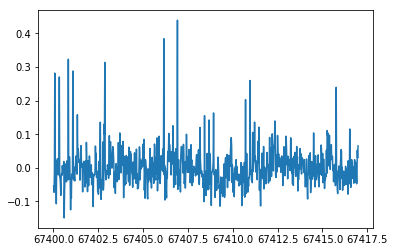

In [4]:
# it looks pretty flat, but let's try flattening it. Why not right?
a = np.polyfit(Time,Flux,10)

p10 = np.poly1d(a)

x = np.linspace(min(Time),max(Time),150)

# plt.plot(x,p10(x))
# plt.plot(Time,Flux,'-')
plt.plot(Time,Flux-p10(Time))

Text(0.5,0,'Frequency (Hz)')

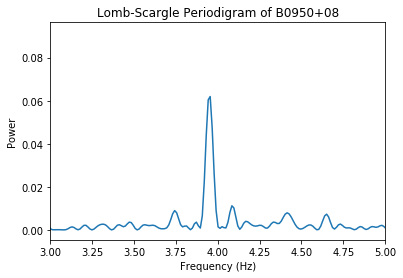

In [5]:
frequency, power = LombScargle(Time, Flux).autopower(nyquist_factor = 1)   # using astropy to take the lombscargle
plt.plot(frequency,power)
plt.xlim(3,5)                                            # we're just zooming in to see the fundamental frequency
plt.title('Lomb-Scargle Periodigram of B0950+08')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')

The frequency of PSR B0950+08 is 3.951551372963 Hz (ATNF database). We'll fit this peak using a gaussian and determine the centroid.

In [6]:
def gaus(x,a,x0,sigma):                           # this is the definition of our gaussian
    return a*np.exp(-(x-x0)**2/(2*sigma**2))      # we're after the parameter x0, this is the centroid.

# x = np.linspace(0,10,200)           # this was just testing the function to make sure it worked
# y = gaus(x,2,5,.2)
# plt.plot(x,y)

In [7]:
freq = []
powe = []

for i in range(len(frequency)):    # once again a dumbass way of doing this but it works and its 3:42am
    if 3 < frequency[i] < 5:
        freq.append(frequency[i])
        powe.append(power[i])

Centroid =  3.9501663235913984
Percent error =  0.03505077476856612


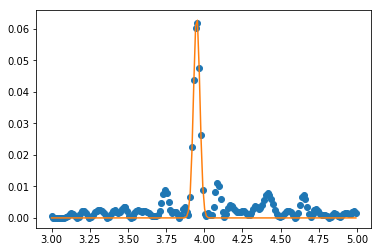

In [8]:
popt,pcov = curve_fit(gaus,freq,powe)

plt.plot(freq,powe,'o')
plt.plot(freq,gaus(freq,*popt))

centroid = popt[1]
print('Centroid = ',centroid)

error = percerr(3.951551372963,centroid)
print('Percent error = ',abs(error))

So we've found the centroid to be less than a half of a tenth of a percent. That's pretty great. Now let's phase fold it (haha phase phold) so we can try to describe its pulse profile

In [10]:
# we're gonna read the data in again here in this cell because every time we run it Flux.extend(Flux) blows up 
# it's not elegant, but this basically resets Flux every time. Time check, its 4:02am so if it works it works


data = pd.read_csv('b0950_cal.txt',delim_whitespace = True)  # reading in data
time = data['UTC_Time(s)']  # putting the pandas dataframe into python lists
xdat = data['XX1']
cal = data['Cal']

Flux = []

for i in range(len(time)):
    
    if 67400 < time[i] < 67417:    # This is not the most elegant way to do this,
        Flux.append(xdat[i])       # we're just taking data from between two time stamps. 
        
        
# phase pholding (hehe) routine
        
modded_time = [math.modf((x-Time[0])/(1/centroid))[0] for x in Time]

new_time = modded_time
new_time = [x - 0.63 for x in new_time]

Now that we've folded the data set, we can plot the new data and look at the pulse profile!

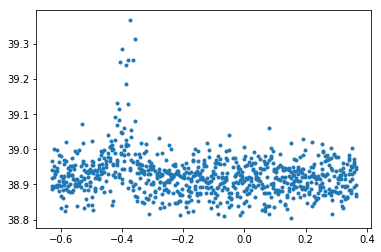

In [11]:
plt.plot(new_time,Flux,'.')